# **Reinforcement Learning Model Training with `ModelTrainer`**

## **1. What is `ModelTrainer`?**
The `ModelTrainer` class is a utility for training and evaluating reinforcement learning (RL) models using [Stable-Baselines3](https://github.com/DLR-RM/stable-baselines3). It supports:
- **PPO (Proximal Policy Optimization)**
- **A2C (Advantage Actor-Critic)**

### **Key Features:**
- Trains RL models with different hyperparameters.
- Supports vectorized environments for parallel training.
- Includes evaluation callbacks to monitor performance.
- Provides visualization tools for analyzing results.


## **2. Setup environment**

This section initializes the VirtualHome environment and retrieves the environment graph.

### Steps:
1. **Specify VirtualHome executable path**  
2. **Establish communication with Unity**  
3. **Reset the environment and add a character**  
4. **Retrieve the environment graph**  
5. **Close the environment**  

The following code performs these steps and returns the environment graph:


In [1]:
from virtualhome.simulation.unity_simulator.comm_unity import UnityCommunication
def get_virtual_home_environment_graph():
    YOUR_FILE_NAME = "D:\\programs\\windows_exec.v2.2.4\\VirtualHome.exe"
    comm = UnityCommunication(file_name=YOUR_FILE_NAME)
    comm.reset(0)
    comm.add_character()
    res, g = comm.environment_graph()
    comm.close()
    return g

### Add search path root

In [2]:
import sys
import os

notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, "../.."))
sys.path.insert(0, project_root)

## **2. Training the Model**

This section demonstrates the process of training a reinforcement learning (RL) model for the VirtualHome environment using the A2C (Advantage Actor-Critic) algorithm.

### **Basic Usage**
The `basic_training` function sets up and runs the model training process for the VirtualHome environment, where the agent is tasked with gathering food and placing it in the fridge.

#### **Steps:**

1. **Initializing the Model Trainer:**
   The `ModelTrainer` object is initialized with:
   - **Algorithm**: The `A2C` algorithm is selected for training the agent.
   - **Environment**: The environment is created using a lambda function that calls `VirtualHomeGatherFoodEnvV2` with the environment graph (`g`).

2. **Training the Model:**
   - The model is trained using the `train` method of `ModelTrainer`.
   - `vec_envs=4`: Specifies the number of parallel environments to use during training, improving data collection efficiency.
   - `total_timesteps=50000`: The total number of timesteps the agent will interact with the environment during training.
   - `hyperparameters_list=[{}]`: Specifies the list of hyperparameters for training. Here, an empty dictionary is passed, which means default hyperparameters will be used.


In [6]:
def basic_training():
    from src.training import ModelTrainer, ModelTrainerRLAlgo
    from src.vh_env import VirtualHomeGatherFoodEnvV2
    
    g = get_virtual_home_environment_graph()
    
    model_trainer = ModelTrainer(
        algo=ModelTrainerRLAlgo.A2C,
        create_env= lambda: VirtualHomeGatherFoodEnvV2(environment_graph=g)
    )

    model_trainer.train(
        vec_envs=4,
        total_timesteps=50000,
        hyperparameters_list=[{}],
    )
    


In [7]:
basic_training()

['D:\\programs\\windows_exec.v2.2.4\\VirtualHome.exe', '-batchmode', '-http-port=8080', '-logFile D:\\code\\llm-reinforce-learning\\docs\\tutorial/Player_8080.log']
Getting connection...
CLOSING PROC


100%|█████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:22<00:00, 2194.91it/s, mean_reward=20, ep_length=3, learning_rate=0.0007, value_loss=0.0157, entropy_loss=-0.00195]


## **3. Training the Model With Hyperparameters List**

In this section, we demonstrate how to perform model training using a batch of hyperparameters. The purpose is to test different combinations of hyperparameters to observe their impact on training performance and outcomes.

### **Batch Training Overview**
The `hyperparameters_batch_training` function allows us to train the model using different sets of hyperparameters to compare the results. This technique is useful for fine-tuning the model and determining the optimal configuration for training the agent in the VirtualHome environment.

#### **Steps:**

1. **Importing Necessary Modules:**
   - `ModelTrainer`: Manages the training of the model.
   - `ModelTrainerRLAlgo`: Contains RL algorithms like A2C (Advantage Actor-Critic) used in training.
   - `VirtualHomeGatherFoodEnvV2`: Defines the task-specific environment for the agent.

2. **Creating the VirtualHome Environment:**
   The `get_virtual_home_environment_graph` function generates the environment's layout and objects, which is then passed to `VirtualHomeGatherFoodEnvV2`.

3. **Defining Hyperparameters List:**
   A list of hyperparameter configurations is specified, where each configuration is a dictionary containing different values for hyperparameters:
   
   ```python
   hyperparameters_list = [
       {"learning_rate": 0.0003, "n_steps": 2048, "gamma": 0.99},
       {"learning_rate": 0.0003, "n_steps": 2048, "gamma": 0.95},
       {"learning_rate": 0.0003, "n_steps": 2048, "gamma": 0.91},
   ]

In this version, I've highlighted the importance of changing one hyperparameter at a time in the **Best Practices** section to ensure effective tuning of the model.



In [13]:
def hyperparameters_batch_training():
    from src.training import ModelTrainer, ModelTrainerRLAlgo
    from src.vh_env import VirtualHomeGatherFoodEnvV2
    
    g = get_virtual_home_environment_graph()
    
    hyperparameters_list = [
        {"learning_rate": 0.0003, "n_steps": 2048, "gamma": 0.99},
        {"learning_rate": 0.0003, "n_steps": 2048, "gamma": 0.95},
        {"learning_rate": 0.0003, "n_steps": 2048, "gamma": 0.91},
    ]
    
    model_trainer = ModelTrainer(
        algo=ModelTrainerRLAlgo.A2C,
        create_env= lambda: VirtualHomeGatherFoodEnvV2(environment_graph=g)
    )

    model_trainer.train(
        vec_envs=4,
        total_timesteps=50000,
        hyperparameters_list=hyperparameters_list,
    )
    

In [14]:
hyperparameters_batch_training()

['D:\\programs\\windows_exec.v2.2.4\\VirtualHome.exe', '-batchmode', '-http-port=8080', '-logFile D:\\code\\llm-reinforce-learning\\docs\\tutorial/Player_8080.log']
Getting connection...
CLOSING PROC


100%|██████████████████████████████████████████████████████████████████████████████████████| 57344/57344 [00:15<00:00, 3662.54it/s, mean_reward=-3140.0, ep_length=64, learning_rate=0.0003, value_loss=2.26e+5, entropy_loss=-1.6]


## **4. Comparing Training Results**

In this section, we will visualize and compare the results of training using different values for the `vf_coef` hyperparameter. We will perform training using multiple configurations of the `vf_coef` parameter and then compare the final mean reward and episode length for each configuration.

### **Step 1: Define the Virtual Home Environment**
We begin by creating a Virtual Home environment graph using the `get_virtual_home_environment_graph()` function. This graph defines the layout and structure of the environment, including the objects, agents, and interactions within the Virtual Home.

### **Step 2: Set Hyperparameters for Training**
We define a list of hyperparameter configurations to be tested during training. These configurations vary the value of the `vf_coef` parameter, which is used to control the value function coefficient in the PPO algorithm. 

### **Step 3: Initialize the Model Trainer**
The `ModelTrainer` class is used to initialize the training process. We specify that we will use the PPO (Proximal Policy Optimization) algorithm and pass the function that creates the environment (`create_env`). This environment is based on the previously created graph `g` and is of type `VirtualHomeGatherFoodEnvV2`.

### **Step 4: Train the Model**
We use the `train()` method to train the model with the specified number of parallel environments (`vec_envs=4`) and total training steps (`total_timesteps=120,000`). The hyperparameter configurations are passed to the trainer to run training for each set of values.

### **Step 5: Compare and Visualize Results**
After training, we compare the results by analyzing the final mean reward and episode length for each value of `vf_coef`. This comparison is done using the `compare_show_final_mean_reward()` and `compare_show_final_ep_length()` methods of the `model_trainer` object.

By the end of this section, we will have a clear visualization of how the value function coefficient affects the agent's performance, allowing us to make informed decisions about hyperparameter tuning for the Virtual Home environment.


In [3]:
def visualized_training():
    from src.training import ModelTrainer, ModelTrainerRLAlgo
    from src.vh_env import VirtualHomeGatherFoodEnvV2
    
    g = get_virtual_home_environment_graph()
    
    hyperparameters_list = [
        {"learning_rate": 0.0003, "n_steps": 2048, "vf_coef": 0.1},
        {"learning_rate": 0.0003, "n_steps": 2048, "vf_coef": 0.3},
        {"learning_rate": 0.0003, "n_steps": 2048, "vf_coef": 0.5},
        {"learning_rate": 0.0003, "n_steps": 2048, "vf_coef": 0.7},
        {"learning_rate": 0.0003, "n_steps": 2048, "vf_coef": 0.9},
    ]
    
    model_trainer = ModelTrainer(
        algo=ModelTrainerRLAlgo.PPO,
        create_env= lambda: VirtualHomeGatherFoodEnvV2(environment_graph=g)
    )

    model_trainer.train(
        vec_envs=4,
        total_timesteps=120_000,
        hyperparameters_list=hyperparameters_list,
    )
    model_trainer.compare_show_final_mean_reward("vf_coef")
    model_trainer.compare_show_final_ep_length("vf_coef")

['D:\\programs\\windows_exec.v2.2.4\\VirtualHome.exe', '-batchmode', '-http-port=8080', '-logFile D:\\code\\llm-reinforce-learning\\docs\\tutorial/Player_8080.log']
Getting connection...
CLOSING PROC


100%|████████████████████████████████████████████████████████████████████████████████████| 122880/122880 [01:37<00:00, 1260.83it/s, mean_reward=6850.0, ep_length=20, learning_rate=0.0003, value_loss=1.11e+7, entropy_loss=-1.24]


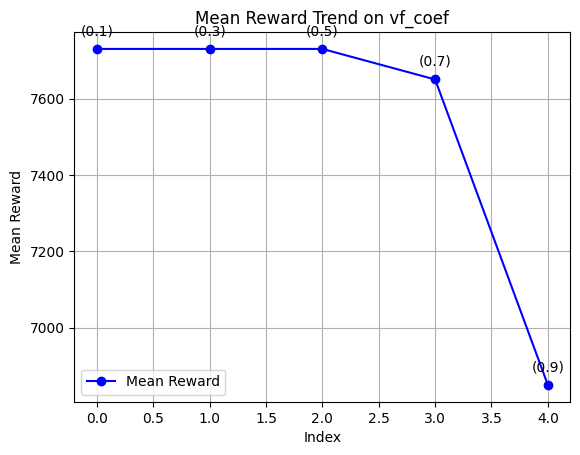

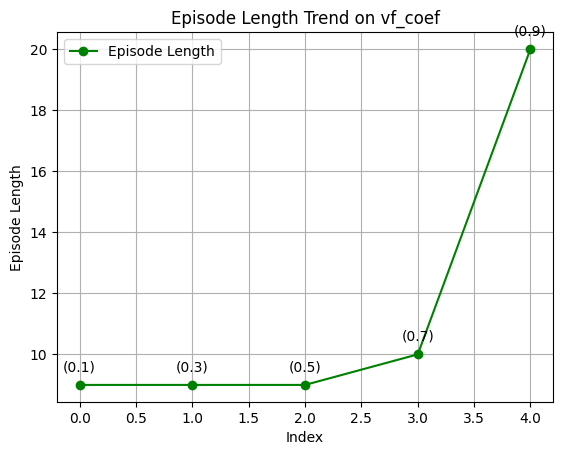

In [4]:
visualized_training()

## **4. Visualizing Training Trend**

### **Overview**
This section trains a reinforcement learning model using different value function coefficients (`vf_coef`) and visualizes the training trends. The `vf_coef` parameter controls the weight of the value function loss in the overall loss calculation. By varying this parameter, we can analyze its impact on training performance.

### **Implementation Steps**

1. **Import Necessary Modules**
    - `ModelTrainer` and `ModelTrainerRLAlgo` for training.
    - `VirtualHomeGatherFoodEnvV2` as the environment.
    - A function to obtain the environment graph.

2. **Setup the Environment Graph**
    - `g = get_virtual_home_environment_graph()` initializes the environment graph.

3. **Define Hyperparameters**
    - A list of hyperparameter configurations with different `vf_coef` values is created.

4. **Initialize ModelTrainer**
    - Uses PPO (`ModelTrainerRLAlgo.PPO`) as the RL algorithm.
    - Creates a vectorized environment with 4 parallel instances.

5. **Train the Model**
    - The model is trained for `120,000` timesteps using the specified hyperparameters.

6. **Visualize Training Trends**
    - `show_entropy_loss("vf_coef")` plots entropy loss to analyze exploration trends.
    - `show_value_loss("vf_coef")` plots value loss to observe the impact of `vf_coef` on learning stability.



In [5]:
def show_training_trend():
    from src.training import ModelTrainer, ModelTrainerRLAlgo
    from src.vh_env import VirtualHomeGatherFoodEnvV2
    
    g = get_virtual_home_environment_graph()
    
    hyperparameters_list = [
        {"learning_rate": 0.0003, "n_steps": 2048, "vf_coef": 0.1},
        {"learning_rate": 0.0003, "n_steps": 2048, "vf_coef": 0.7},
        {"learning_rate": 0.0003, "n_steps": 2048, "vf_coef": 0.9},
    ]
    
    model_trainer = ModelTrainer(
        algo=ModelTrainerRLAlgo.PPO,
        create_env= lambda: VirtualHomeGatherFoodEnvV2(environment_graph=g)
    )

    model_trainer.train(
        vec_envs=4,
        total_timesteps=120_000,
        hyperparameters_list=hyperparameters_list,
    )
    model_trainer.show_entropy_loss("vf_coef")
    model_trainer.show_value_loss("vf_coef")
    

['D:\\programs\\windows_exec.v2.2.4\\VirtualHome.exe', '-batchmode', '-http-port=8080', '-logFile D:\\code\\llm-reinforce-learning\\docs\\tutorial/Player_8080.log']
Getting connection...
CLOSING PROC


100%|████████████████████████████████████████████████████████████████████████████████████| 122880/122880 [01:38<00:00, 1246.78it/s, mean_reward=6530.0, ep_length=24, learning_rate=0.0003, value_loss=9.65e+6, entropy_loss=-1.28]


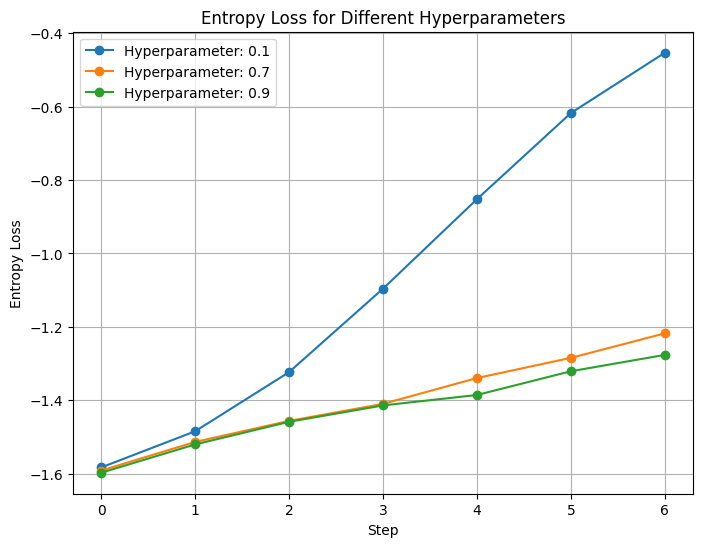

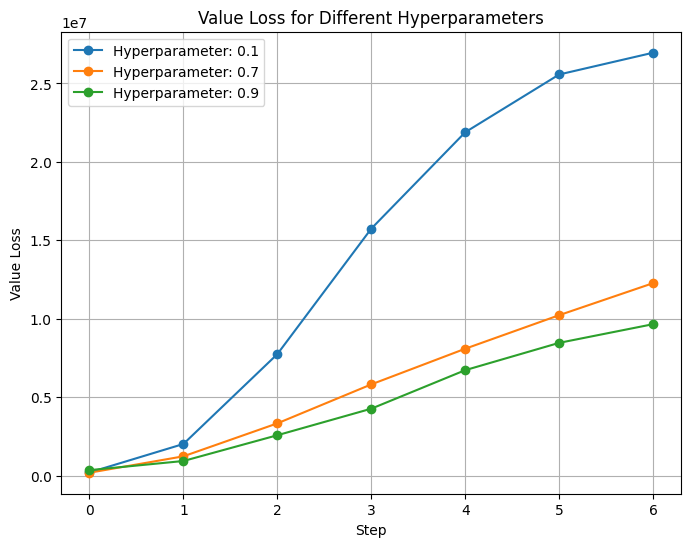

In [6]:
show_training_trend()